<a href="https://colab.research.google.com/github/Aytsan11/ML/blob/main/ML_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!pip install pandas scikit-learn seaborn scipy

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/employee.csv')

In [51]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [52]:
df.department = df.department.astype('category')
df.salary = df.salary.map({'low': 1, 'medium': 2, 'high': 3})

In [53]:
y_regression = df['average_montly_hours'] # числовая переменная как y
X_regression = df.copy().drop('average_montly_hours', axis=1).reindex() # переменные для проверки влияния

y_classification = df['salary'] # категориальная переменная как y
X_classification = df.copy().drop('salary', axis=1).reindex() # переменные для проверки влияния

In [54]:
X_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   time_spend_company     14999 non-null  int64   
 4   Work_accident          14999 non-null  int64   
 5   promotion_last_5years  14999 non-null  int64   
 6   department             14999 non-null  category
 7   salary                 14999 non-null  int64   
 8   left                   14999 non-null  int64   
dtypes: category(1), float64(2), int64(6)
memory usage: 952.6 KB


In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [56]:
# Выделение числовых и категориальных колонок
numerical_features_regression = X_regression.select_dtypes(include=['float64', 'int64']).columns
categorical_features_regression = X_regression.select_dtypes(include=['category']).columns

numerical_features_classification = X_classification.select_dtypes(include=['float64', 'int64']).columns
categorical_features_classification = X_classification.select_dtypes(include=['category']).columns

# Создание трансформеров
preprocessor_regression = ColumnTransformer(
  [
    ('num', StandardScaler(), numerical_features_regression),
    ('cat', OneHotEncoder(), categorical_features_regression),
  ],
  verbose=True
)

preprocessor_classification = ColumnTransformer(
  [
    ('num', StandardScaler(), numerical_features_classification),
    ('cat', OneHotEncoder(), categorical_features_classification)
  ],
  verbose=True
)

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Разделение данных
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=28
)

# Пайплайн для регрессии
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),  # Включает StandardScaler и OneHotEncoder
    ('regressor', LinearRegression())          # Модель
], verbose=True)

# Обучение модели
regression_pipeline.fit(X_train_reg, y_train_reg)

# Предсказания
y_pred_reg = regression_pipeline.predict(X_test_reg)

# Метрики для регрессии
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)

print(f"\nСреднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Корень из MSE (RMSE): {rmse:.4f}")
print(f"Средний абсолютный процент ошибки (MAPE): {mape:.4f}, то есть {mape * 100:.4f}%")

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s

Среднеквадратичная ошибка (MSE): 1952.4704
Корень из MSE (RMSE): 44.1868
Средний абсолютный процент ошибки (MAPE): 0.1977, то есть 19.7656%


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Разделение данных
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=28
)

# Пайплайн для классификации
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),  # Включает StandardScaler и OneHotEncoder
    ('classifier', DecisionTreeClassifier(random_state=42))
], verbose=True)

# Обучение модели
classification_pipeline.fit(X_train_clf, y_train_clf)

# Предсказания
y_pred_clf = classification_pipeline.predict(X_test_clf)
y_pred_proba_clf = classification_pipeline.predict_proba(X_test_clf)

# Метрики для классификации
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')
auc = roc_auc_score(y_test_clf, y_pred_proba_clf, multi_class='ovr', average='weighted')
logloss = log_loss(y_test_clf, y_pred_proba_clf)

print(f"Точность (accuracy): {accuracy:.4f}")
print(f"Точность (precision): {precision:.4f}")
print(f"Полнота (recall): {recall:.4f}")
print(f"F1-мера: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Логарифмическая потеря (log-loss): {logloss:.4f}")

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
Точность (accuracy): 0.6087
Точность (precision): 0.6102
Полнота (recall): 0.6087
F1-мера: 0.6094
AUC: 0.6575
Логарифмическая потеря (log-loss): 14.0938


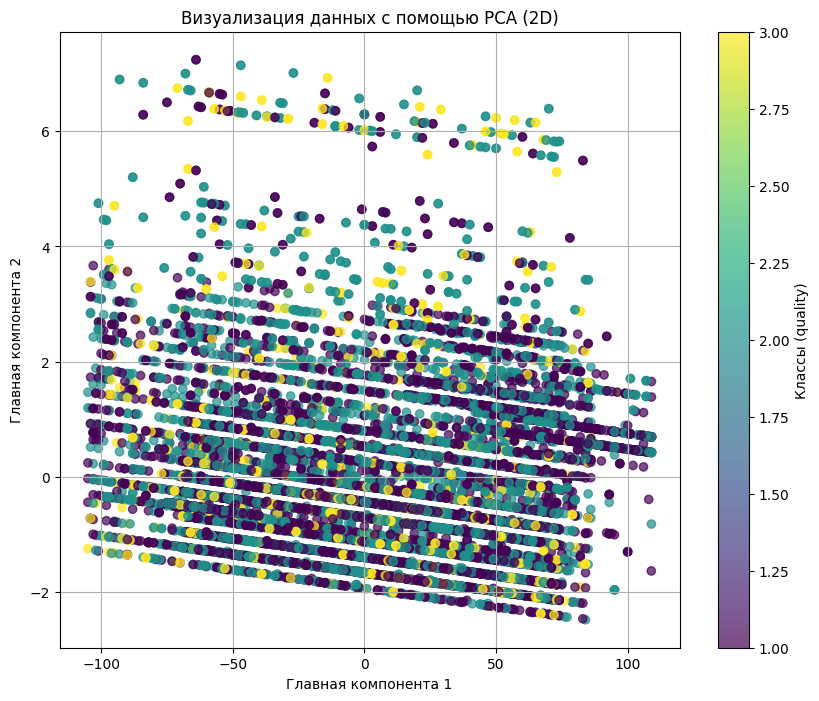

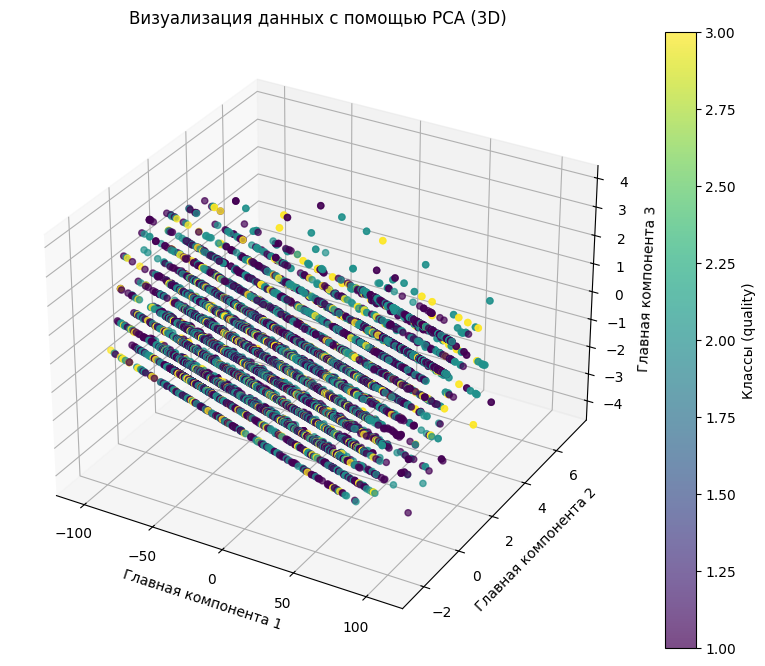

Точность классификации с PCA (2D): 0.5997
Точность классификации с PCA (3D): 0.5980


In [59]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# Преобразование данных с помощью PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

# 2D визуализация PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Классы (quality)')
plt.title("Визуализация данных с помощью PCA (2D)")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.grid(True)
plt.show()

# 3D визуализация PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Классы (quality)')
ax.set_title("Визуализация данных с помощью PCA (3D)")
ax.set_xlabel("Главная компонента 1")
ax.set_ylabel("Главная компонента 2")
ax.set_zlabel("Главная компонента 3")
plt.show()

# Классификация PCA (2D и 3D)
# Разделение данных
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_pca_2d, y_classification, test_size=0.2, random_state=42)
X_train_3d, X_test_3d = train_test_split(X_pca_3d, test_size=0.2, random_state=42)

# Модель
clf = RandomForestClassifier(random_state=42)

# Обучение на 2D данных
clf.fit(X_train_2d, y_train)
y_pred_2d = clf.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test, y_pred_2d)
print(f"Точность классификации с PCA (2D): {accuracy_2d:.4f}")

# Обучение на 3D данных
clf.fit(X_train_3d, y_train)
y_pred_3d = clf.predict(X_test_3d)
accuracy_3d = accuracy_score(y_test, y_pred_3d)
print(f"Точность классификации с PCA (3D): {accuracy_3d:.4f}")

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# Определение параметров для поиска
param_grid_regression = {
    'regressor__alpha': [0.1, 1.0, 10.0]  # Параметры регуляризации для Ridge
}

param_random_regression = {
    'regressor__alpha': np.linspace(0.1, 10, 100)  # Диапазон для случайного поиска
}

# Пайплайн для регрессии
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),
    ('regressor', Ridge())
], verbose=True)

# GridSearchCV для регрессии
grid_search_reg = GridSearchCV(regression_pipeline, param_grid=param_grid_regression, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_reg.fit(X_train_reg, y_train_reg)
print("\nЛучшие параметры (GridSearch) для регрессии:", grid_search_reg.best_params_)
print("Лучший MSE (GridSearch):", -grid_search_reg.best_score_)

# RandomizedSearchCV для регрессии
random_search_reg = RandomizedSearchCV(regression_pipeline, param_distributions=param_random_regression, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42)
random_search_reg.fit(X_train_reg, y_train_reg)
print("\nЛучшие параметры (RandomSearch) для регрессии:", random_search_reg.best_params_)
print("Лучший MSE (RandomSearch):", -random_search_reg.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransforme

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Разделение данных
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=28,
)

# Пайплайн для регрессии
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),  # Включает StandardScaler и OneHotEncoder
    ('regressor', Ridge(alpha=10))          # Модель
], verbose=True)

# Обучение модели
regression_pipeline.fit(X_train_reg, y_train_reg)

# Предсказания
y_pred_reg = regression_pipeline.predict(X_test_reg)

# Метрики для регрессии
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)

print(f"\nСреднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Корень из MSE (RMSE): {rmse:.4f}")
print(f"Средний абсолютный процент ошибки (MAPE): {mape:.4f}, то есть {mape * 100:.4f}%")

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s

Среднеквадратичная ошибка (MSE): 1952.3654
Корень из MSE (RMSE): 44.1856
Средний абсолютный процент ошибки (MAPE): 0.1977, то есть 19.7666%


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Определение параметров для поиска
param_grid_classification = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}

param_random_classification = {
    'classifier__max_depth': np.arange(1, 20),
    'classifier__min_samples_split': np.arange(2, 20)
}

# Пайплайн для классификации
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),
    ('classifier', DecisionTreeClassifier(random_state=42))
], verbose=True)

# GridSearchCV для классификации
grid_search_clf = GridSearchCV(classification_pipeline, param_grid=param_grid_classification, cv=5, scoring='accuracy', verbose=1)
grid_search_clf.fit(X_train_clf, y_train_clf)
print("\nЛучшие параметры (GridSearch) для классификации:", grid_search_clf.best_params_)
print("Лучшая точность (GridSearch):", grid_search_clf.best_score_)

# RandomizedSearchCV для классификации
random_search_clf = RandomizedSearchCV(classification_pipeline, param_distributions=param_random_classification, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)
random_search_clf.fit(X_train_clf, y_train_clf)
print("\nЛучшие параметры (RandomSearch) для классификации:", random_search_clf.best_params_)
print("Лучшая точность (RandomSearch):", random_search_clf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransforme

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Разделение данных
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=28
)

# Пайплайн для классификации
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),  # Включает StandardScaler и OneHotEncoder
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=16, min_samples_split=7))
], verbose=True)

# Обучение модели
classification_pipeline.fit(X_train_clf, y_train_clf)

# Предсказания
y_pred_clf = classification_pipeline.predict(X_test_clf)
y_pred_proba_clf = classification_pipeline.predict_proba(X_test_clf)

# Метрики для классификации
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')
auc = roc_auc_score(y_test_clf, y_pred_proba_clf, multi_class='ovr', average='weighted')
logloss = log_loss(y_test_clf, y_pred_proba_clf)

print(f"Точность (accuracy): {accuracy:.4f}")
print(f"Точность (precision): {precision:.4f}")
print(f"Полнота (recall): {recall:.4f}")
print(f"F1-мера: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Логарифмическая потеря (log-loss): {logloss:.4f}")

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
Точность (accuracy): 0.5460
Точность (precision): 0.5398
Полнота (recall): 0.5460
F1-мера: 0.5365
AUC: 0.6282
Логарифмическая потеря (log-loss): 4.1902


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Загрузка данных (предполагаем, что df уже загружен)
# Преобразование качества в бинарный признак
df['veteran'] = (df['time_spend_company'].astype(int) >= 5).astype(int)

# Удаляем `time_spend_company` из данных
X = df.drop(columns=['time_spend_company', 'veteran'])
y = df['veteran']

# Разделение признаков на числовые и категориальные
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование числовых данных
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# Преобразование категориальных данных
encoder = OneHotEncoder()
X_train_categorical = encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_features]).toarray()

# Объединение преобразованных данных
import numpy as np
X_train_transformed = np.hstack([X_train_numeric, X_train_categorical])
X_test_transformed = np.hstack([X_test_numeric, X_test_categorical])

# Определение параметров для RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Обучение RandomForestClassifier с RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    verbose=1
)

random_search.fit(X_train_transformed, y_train)

# Лучшие параметры и точность
best_params = random_search.best_params_
best_score = random_search.best_score_

# Тестирование на отложенной выборке
y_pred = random_search.best_estimator_.predict(X_test_transformed)
test_accuracy = accuracy_score(y_test, y_pred)

print("\nЛучшие параметры:", best_params)
print(f"Лучшая точность на кросс-валидации: {best_score:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Лучшие параметры: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Лучшая точность на кросс-валидации: 0.9127
Точность на тестовой выборке: 0.9087


In [65]:
!pip install catboost

In [66]:
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Разделение данных
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=28
)

# Пайплайн для регрессии
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),  # Включает StandardScaler и OneHotEncoder
    ('regressor', CatBoostRegressor(verbose=0))          # Модель
], verbose=True)

# Обучение модели
regression_pipeline.fit(X_train_reg, y_train_reg)

# Предсказания
y_pred_reg = regression_pipeline.predict(X_test_reg)

# Метрики для регрессии
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)

print(f"\nСреднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Корень из MSE (RMSE): {rmse:.4f}")
print(f"Средний абсолютный процент ошибки (MAPE): {mape:.4f}, то есть {mape * 100:.4f}%")

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   6.3s

Среднеквадратичная ошибка (MSE): 1589.8221
Корень из MSE (RMSE): 39.8726
Средний абсолютный процент ошибки (MAPE): 0.1718, то есть 17.1766%


In [67]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Разделение данных
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=28
)

# Пайплайн для классификации
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),  # Включает StandardScaler и OneHotEncoder
    ('classifier', CatBoostClassifier(random_state=42, verbose=0))
], verbose=True)

# Обучение модели
classification_pipeline.fit(X_train_clf, y_train_clf)

# Предсказания
y_pred_clf = classification_pipeline.predict(X_test_clf)
y_pred_proba_clf = classification_pipeline.predict_proba(X_test_clf)

# Метрики для классификации
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')
auc = roc_auc_score(y_test_clf, y_pred_proba_clf, multi_class='ovr', average='weighted')
logloss = log_loss(y_test_clf, y_pred_proba_clf)

print(f"Точность (accuracy): {accuracy:.4f}")
print(f"Точность (precision): {precision:.4f}")
print(f"Полнота (recall): {recall:.4f}")
print(f"F1-мера: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Логарифмическая потеря (log-loss): {logloss:.4f}")

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   6.1s
Точность (accuracy): 0.5697
Точность (precision): 0.5795
Полнота (recall): 0.5697
F1-мера: 0.5579
AUC: 0.6547
Логарифмическая потеря (log-loss): 0.8478


**CatBoost** — это умный алгоритм машинного обучения, который отлично справляется с задачами классификации и регрессии, особенно когда в данных много категориальных признаков

**Главные идеи CatBoost:**

* Обработка категориальных признаков

Мы хотим предсказать, купит ли человек товар, и в данных есть колонка "Город". Проблема в том, что города нельзя сравнивать по порядку, как числа.
CatBoost автоматически преобразует категории в числа с помощью статистики. Например, он может посмотреть, сколько людей из каждого города купили товар, и использовать эту информацию. Это позволяет работать с категориями напрямую, без необходимости вручную преобразовывать их в числа.

* Ordered Boosting

Мы учим модель предсказывать, сдаст ли студент экзамен, зная его оценки. Если модель посмотрит на итоговый ответ (сдал или нет) для всех данных сразу, это приведет к переобучению. CatBoost решает это с помощью подхода "Ordered Boosting". Он разделяет данные так, что модель на каждом этапе учится только на тех данных, которые были до текущего момента.

* Работа с несбалансированными данными

Ей пофиг, сколько у нас в каком классе данных. Работаем! 💪

In [68]:
!pip install umap-learn

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: Use

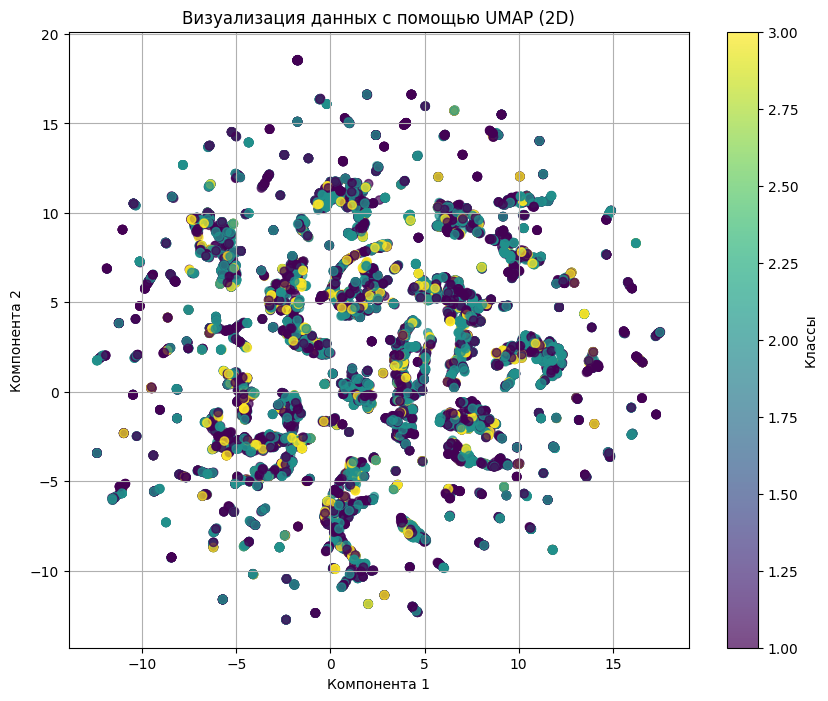

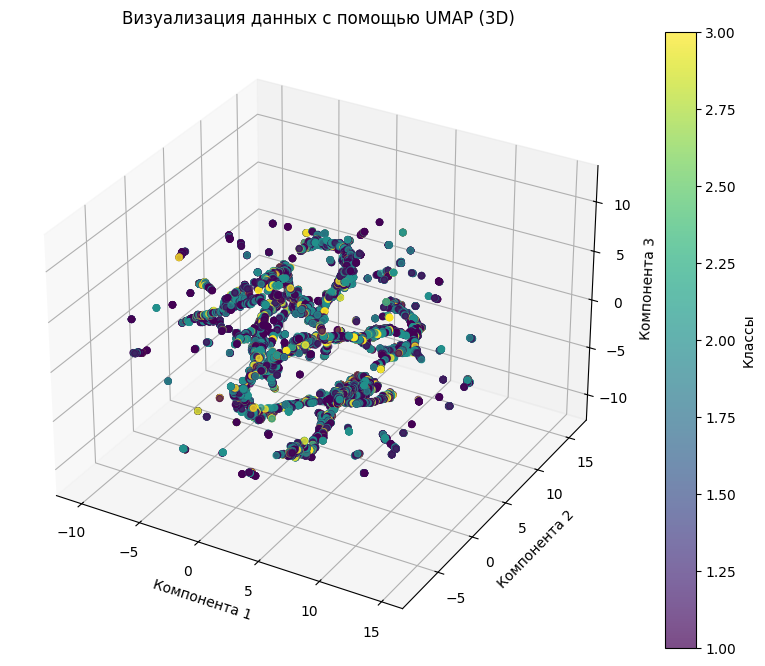

Точность классификации с UMAP (2D): 0.5250
Точность классификации с UMAP (3D): 0.5277


In [69]:
import umap.umap_ as umap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Преобразование данных с помощью UMAP
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

umap_3d = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_3d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

# 2D визуализация
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Классы')
plt.title("Визуализация данных с помощью UMAP (2D)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.grid(True)
plt.show()

# 3D визуализация
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Классы')
ax.set_title("Визуализация данных с помощью UMAP (3D)")
ax.set_xlabel("Компонента 1")
ax.set_ylabel("Компонента 2")
ax.set_zlabel("Компонента 3")
plt.show()

# Классификация UMAP (2D и 3D)
# Разделение данных
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_umap_2d, y_classification, test_size=0.2, random_state=42)
X_train_3d, X_test_3d, y_train, y_test = train_test_split(X_umap_3d, y_classification, test_size=0.2, random_state=42)

# Модель
clf = RandomForestClassifier(random_state=42)

# Обучение на 2D данных
clf.fit(X_train_2d, y_train)
y_pred_2d = clf.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test, y_pred_2d)
print(f"Точность классификации с UMAP (2D): {accuracy_2d:.4f}")

# Обучение на 3D данных
clf.fit(X_train_3d, y_train)
y_pred_3d = clf.predict(X_test_3d)
accuracy_3d = accuracy_score(y_test, y_pred_3d)
print(f"Точность классификации с UMAP (3D): {accuracy_3d:.4f}")

In [100]:
import pandas as pd

# Загрузка файла
data = pd.read_csv('/content/pokemon.csv')

# Просмотр первых строк датасета
data

,Name,Type1,Type2,Evolution
0,bulbasaur,Grass,Poison,ivysaur
1,ivysaur,Grass,Poison,venusaur
2,venusaur,Grass,Poison,NaN
3,charmander,Fire,NaN,charmeleon
4,charmeleon,Fire,NaN,charizard
...,...,...,...,...
804,stakataka,Rock,Steel,NaN
805,blacephalon,Fire,Ghost,NaN
806,zeraora,Electric,NaN,NaN
807,meltan,Steel,NaN,NaN


In [101]:
import os

# Путь к папке с изображениями
image_folder = "/content/drive/MyDrive/images"

# Добавляем пути к изображениям
data['Image'] = data['Name'].apply(lambda x: os.path.join(image_folder, f"{x}.png"))

In [102]:
data

,Name,Type1,Type2,Evolution,Image
0,bulbasaur,Grass,Poison,ivysaur,/content/drive/MyDrive/images/bulbasaur.png
1,ivysaur,Grass,Poison,venusaur,/content/drive/MyDrive/images/ivysaur.png
2,venusaur,Grass,Poison,NaN,/content/drive/MyDrive/images/venusaur.png
3,charmander,Fire,NaN,charmeleon,/content/drive/MyDrive/images/charmander.png
4,charmeleon,Fire,NaN,charizard,/content/drive/MyDrive/images/charmeleon.png
...,...,...,...,...,...
804,stakataka,Rock,Steel,NaN,/content/drive/MyDrive/images/stakataka.png
805,blacephalon,Fire,Ghost,NaN,/content/drive/MyDrive/images/blacephalon.png
806,zeraora,Electric,NaN,NaN,/content/drive/MyDrive/images/zeraora.png
807,meltan,Steel,NaN,NaN,/content/drive/MyDrive/images/meltan.png


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       809 non-null    object
 1   Type1      809 non-null    object
 2   Type2      405 non-null    object
 3   Evolution  32 non-null     object
 4   Image      809 non-null    object
dtypes: object(5)
memory usage: 31.7+ KB


In [104]:
# Количество уникальных значений
for column in data.columns:
    print(f'{column}: {data[column].nunique()} уникальных значений')

Name: 809 уникальных значений
Type1: 18 уникальных значений
Type2: 18 уникальных значений
Evolution: 32 уникальных значений
Image: 809 уникальных значений


In [95]:
data['Type2'] = data['Type2'].fillna("None")  # Заполняем пропуски в Type2
data['Evolution'] = data['Evolution'].fillna("None")  # Заполняем пропуски в Evolution

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       809 non-null    object
 1   Type1      809 non-null    object
 2   Type2      809 non-null    object
 3   Evolution  809 non-null    object
 4   Image      809 non-null    object
dtypes: object(5)
memory usage: 31.7+ KB


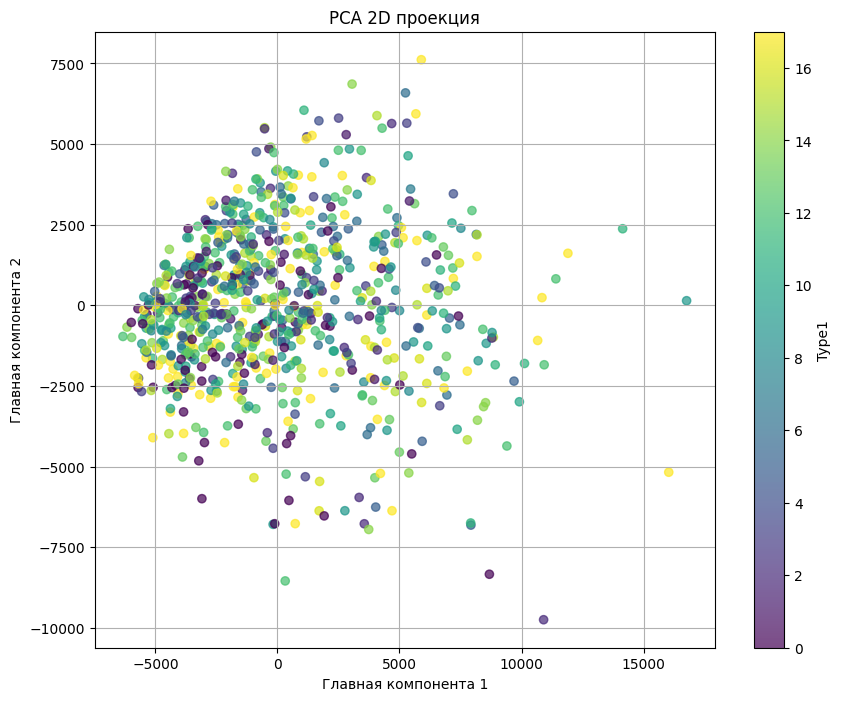

Точность классификации: 0.1667
Отчет о классификации:
              precision    recall  f1-score   support

         Bug       0.09      0.17      0.12        12
        Dark       0.33      0.75      0.46         4
      Dragon       0.00      0.00      0.00         3
    Electric       0.50      0.12      0.20         8
       Fairy       0.00      0.00      0.00         5
    Fighting       0.00      0.00      0.00        10
        Fire       0.12      0.12      0.12         8
      Flying       0.00      0.00      0.00         1
       Ghost       0.00      0.00      0.00         8
       Grass       0.16      0.20      0.18        15
      Ground       0.00      0.00      0.00        10
         Ice       0.00      0.00      0.00         4
      Normal       0.15      0.33      0.21        21
      Poison       0.00      0.00      0.00        10
     Psychic       0.00      0.00      0.00        10
        Rock       0.00      0.00      0.00         9
       Steel       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [108]:
from PIL import Image

# Преобразование изображений в массив
image_data = []
labels = []

for _, row in data.iterrows():
    try:
        # Загружаем изображение и преобразуем в grayscale
        img = Image.open(row['Image']).convert('RGB').resize((128, 128))
        image_data.append(np.array(img).flatten())  # Преобразуем в одномерный массив
        labels.append(row['Type1'])  # Используем Type1 как метку
    except FileNotFoundError:
        print(f"Файл не найден: {row['Image']}")

# Преобразуем в numpy-массив
X = np.array(image_data)
y = np.array(labels)

# Преобразуем категориальные метки в числовые
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Type1')
plt.title("PCA 2D проекция")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.grid(True)
plt.show()

# Обучение модели
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Предсказания
y_pred = clf.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность классификации: {accuracy:.4f}")
print("Отчет о классификации:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

In [105]:
# Супертипы
type_mapping = {
    'Fire': 'Attack',
    'Electric': 'Attack',
    'Fighting': 'Attack',
    'Dragon': 'Attack',
    'Grass': 'Defense',
    'Water': 'Defense',
    'Ice': 'Defense',
    'Ground': 'Defense',
    'Rock': 'Defense',
    'Flying': 'Support',
    'Psychic': 'Support',
    'Normal': 'Support',
    'Ghost': 'Support',
    'Dark': 'Support',
    'Bug': 'Support',
    'Steel': 'Defense',
    'Poison': 'Support',
    'Fairy': 'Support'
}

# Преобразование Type1 в супертипы
data['SuperType'] = data['Type1'].map(type_mapping)

In [106]:
data

,Name,Type1,Type2,Evolution,Image,SuperType
0,bulbasaur,Grass,Poison,ivysaur,/content/drive/MyDrive/images/bulbasaur.png,Defense
1,ivysaur,Grass,Poison,venusaur,/content/drive/MyDrive/images/ivysaur.png,Defense
2,venusaur,Grass,Poison,NaN,/content/drive/MyDrive/images/venusaur.png,Defense
3,charmander,Fire,NaN,charmeleon,/content/drive/MyDrive/images/charmander.png,Attack
4,charmeleon,Fire,NaN,charizard,/content/drive/MyDrive/images/charmeleon.png,Attack
...,...,...,...,...,...,...
804,stakataka,Rock,Steel,NaN,/content/drive/MyDrive/images/stakataka.png,Defense
805,blacephalon,Fire,Ghost,NaN,/content/drive/MyDrive/images/blacephalon.png,Attack
806,zeraora,Electric,NaN,NaN,/content/drive/MyDrive/images/zeraora.png,Attack
807,meltan,Steel,NaN,NaN,/content/drive/MyDrive/images/meltan.png,Defense


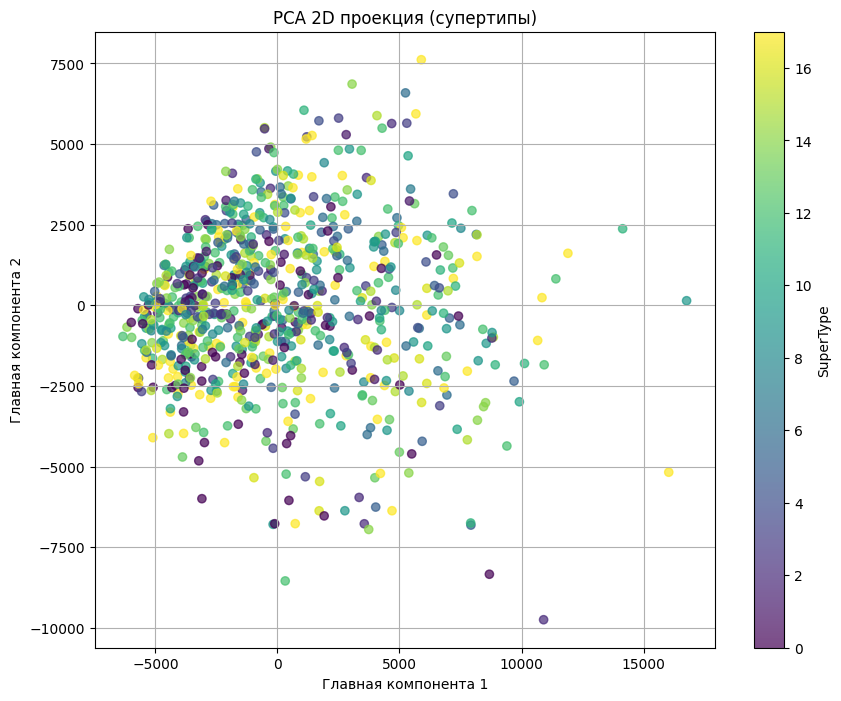

Точность классификации: 0.5309
Отчет о классификации:
              precision    recall  f1-score   support

      Attack       0.14      0.03      0.06        29
     Defense       0.56      0.50      0.53        62
     Support       0.54      0.76      0.63        71

    accuracy                           0.53       162
   macro avg       0.42      0.43      0.41       162
weighted avg       0.48      0.53      0.49       162



In [116]:
from sklearn.neighbors import KNeighborsClassifier
# Преобразуем метки SuperType
labels = []
image_data = []
for _, row in data.iterrows():
    try:
        # Добавляем супертип вместо оригинального типа
        img = Image.open(row['Image']).convert('RGB').resize((128, 128))
        image_data.append(np.array(img).flatten())
        labels.append(row['SuperType'])  # Используем SuperType как метку
    except FileNotFoundError:
        print(f"Файл не найден: {row['Image']}")

# Преобразуем в numpy массив

X_sup = np.array(image_data)
y_sup = np.array(labels)

# Преобразуем категориальные метки в числовые
le = LabelEncoder()
y_encoded_sup = le.fit_transform(y_sup)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_sup, y_encoded_sup, test_size=0.2, random_state=42)

# PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sup)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='SuperType')
plt.title("PCA 2D проекция (супертипы)")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.grid(True)
plt.show()

# Обучение модели
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train, y_train)

# Предсказания
y_pred = clf.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность классификации: {accuracy:.4f}")
print("Отчет о классификации:")
print(classification_report(y_test, y_pred, target_names=le.classes_))